In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [35]:
# Load the dataset from Keras
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

# Combine the original train and test sets to form a complete dataset
x_full = np.concatenate([x_train_orig, x_test_orig])
y_full = np.concatenate([y_train_orig, y_test_orig])

# Normalize pixel values to the [0, 1] range
x_full = x_full / 255.0

# Reshape the data to include the channel dimension (28, 28, 1) for the CNN
x_full = x_full[..., np.newaxis]

print("Shape of the full dataset:", x_full.shape)
print("Number of labels:", len(y_full))

Shape of the full dataset: (70000, 28, 28, 1)
Number of labels: 70000


In [37]:
# Step 1: Split into 80% (train+validation) and 20% (test)
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x_full, y_full, test_size=0.20, random_state=42, stratify=y_full

)

# Step 2: Split the 80% portion into 75% (train) and 25% (validation)
# This results in 60% train and 20% validation of the original total
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Training set shape:   {x_train.shape} (60%)")
print(f"Validation set shape: {x_val.shape} (20%)")
print(f"Test set shape:       {x_test.shape} (20%)")

Training set shape:   (42000, 28, 28, 1) (60%)
Validation set shape: (14000, 28, 28, 1) (20%)
Test set shape:       (14000, 28, 28, 1) (20%)


In [46]:
model = tf.keras.Sequential([
    # Input Layer (and first convolutional layer)
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    # First pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    # Second pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to transition from 2D to 1D
    tf.keras.layers.Flatten(),

    # First fully connected (Dense) layer
    tf.keras.layers.Dense(units=128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    # Output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,690 (1.92 MB)

 Trainable params: 503,690 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:

print("Starting model training...")

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_val, y_val)
)

print("Training complete!")

🚀 Starting model training...
Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 143s 213ms/step - accuracy: 0.8866 - loss: 0.5866 - val_accuracy: 0.9802 - val_loss: 0.1835
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 153s 231ms/step - accuracy: 0.9795 - loss: 0.1698 - val_accuracy: 0.9804 - val_loss: 0.1387
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 140s 212ms/step - accuracy: 0.9832 - loss: 0.1245 - val_accuracy: 0.9794 - val_loss: 0.1310
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 150s 228ms/step - accuracy: 0.9859 - loss: 0.1085 - val_accuracy: 0.9840 - val_loss: 0.1117
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 149s 226ms/step - accuracy: 0.9848 - loss: 0.1037 - val_accuracy: 0.9809 - val_loss: 0.1129
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 139s 212ms/step - accuracy: 0.9880 - loss: 0.0909 - val_accuracy: 0.9797 - val_loss: 0.1153
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 138s 210ms/step - accuracy: 0.9887 - loss: 0.0864 - val_accuracy: 0.9854 - val_loss: 0.0969
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 152s 22

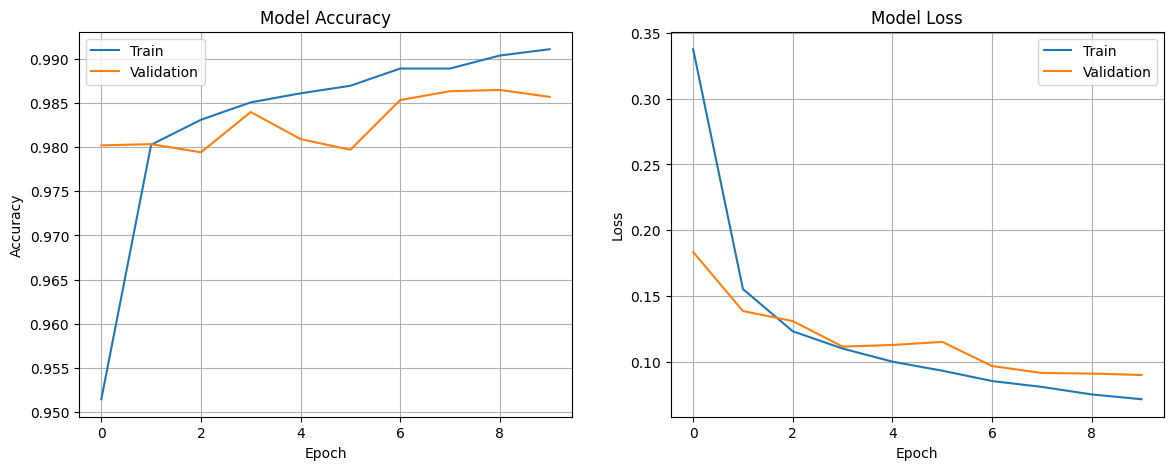

In [49]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    ax1.grid(True)

    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')
    ax2.grid(True)

    plt.show()

plot_history(history)

In [50]:
print("Evaluating model performance on the unseen test dataset...")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Evaluating model performance on the unseen test dataset...
438/438 - 12s - 27ms/step - accuracy: 0.9875 - loss: 0.0833

Test Loss:     0.0833
Test Accuracy: 98.75%


In [52]:
!pip install opencv-python-headless

In [85]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def preprocess_and_predict(image_bytes, model):
    # --- 1. Decode User Input Image ---
    image_nparray = np.frombuffer(image_bytes, np.uint8)
    image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # --- 2. Binarization ---
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    binary = cv2.adaptiveThreshold(
        blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # --- 3. Contour Detection ---
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No contours found!")
        return
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit_crop = binary[y:y+h, x:x+w]

    # Optional: thicken strokes
    kernel = np.ones((2,2), np.uint8)
    digit_crop = cv2.dilate(digit_crop, kernel, iterations=1)

    # --- 4. Make square and resize like MNIST ---
    max_dim = max(w,h)
    square = np.zeros((max_dim, max_dim), dtype=np.uint8)
    square[(max_dim-h)//2:(max_dim-h)//2+h,
           (max_dim-w)//2:(max_dim-w)//2+w] = digit_crop

    resized = cv2.resize(square, (20,20), interpolation=cv2.INTER_AREA)

    final_image = np.zeros((28,28), dtype=np.uint8)
    final_image[4:24, 4:24] = resized

    # --- 5. Normalize for model ---
    model_input = final_image.astype("float32") / 255.0
    model_input = model_input.reshape(1,28,28,1)

    # --- 6. Prediction ---
    prediction = model.predict(model_input)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # --- 7. Show outputs ---
    print("User Input Image:")
    cv2_imshow(cv2.resize(image, (150,150)))

    print("\n Binarized Image (after preprocessing):")
    cv2_imshow(cv2.resize(binary, (150,150)))

    print("\n3Final 28x28 Image Fed to Model:")
    cv2_imshow(cv2.resize(final_image, (150,150), interpolation=cv2.INTER_NEAREST))

    print("\n--- Prediction Result ---")
    print(f"Predicted Digit: {predicted_digit}")
    print(f"Confidence: {confidence:.2f}%")

    return predicted_digit, confidence


Saving Raja 1.jpg to Raja 1.jpg
Processing Raja 1.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1️⃣ User Input Image:


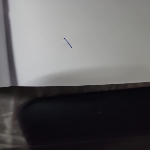


2️⃣ Binarized Image (after preprocessing):


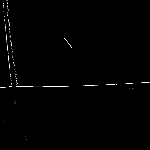


3️⃣ Final 28x28 Image Fed to Model:


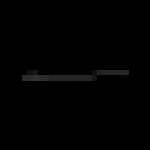


--- Prediction Result ---
✅ Predicted Digit: 4
📊 Confidence: 19.23%


In [99]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"Processing {file_name}...")
    preprocess_and_predict(uploaded[file_name], model)
    break
